In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

데이터 불러오기 및 전처리

In [ ]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch5 Decision Tree/galaxy.csv'
data = pd.read_csv(data_path)

In [ ]:
data = data.fillna('Unknown')

In [ ]:
# Black 색깔 통합
def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:        
        return 'Black'
    else:
        return x 
data['color'] = data['color'].apply(lambda x: black(x))

In [ ]:
# class -> numeric 값으로 변경
data = pd.get_dummies(data, columns=['carrier', 'color', 'productline', 'noDescription'])

Decision Tree 모델 정의 및 학습

In [ ]:
X = data.drop('sold', axis=1)
y = data['sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
model = DecisionTreeClassifier(max_depth=10)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

모델 예측 및 평가

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8047138047138047

최적의 Max Depth 찾기 (파라미터 튜닝)

In [ ]:
list_accuracy = []
for i in range(2,31):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  list_accuracy.append(round(accuracy_score(y_test,pred), 4))

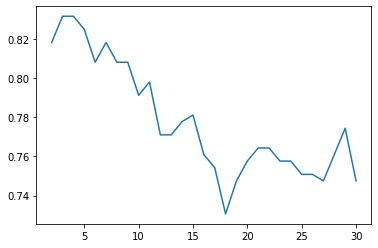

In [ ]:
sns.lineplot(x = list(range(2,31)), y = list_accuracy)

최적의 Max Depth(3)으로 다시 모델링, 평가

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_test, pred)

0.8316498316498316

In [ ]:
confusion_matrix(y_test, pred)

array([[151,  10],
       [ 40,  96]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       161
           1       0.91      0.71      0.79       136

    accuracy                           0.83       297
   macro avg       0.85      0.82      0.83       297
weighted avg       0.84      0.83      0.83       297



Tree Plot 만들기

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '0.43\n230\n[158, 72]'),
 Text(209.25, 67.94999999999999, '0.42\n10\n[3, 7]'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '0.319\n367\n[294, 73]'),
 Text(488.25, 67.94999999999999, '0.038\n52\n[51, 1]'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '0.108\n210\n[12, 198]'),
 Text(767.25, 67.94999999999999, '0.362\n122\n[29, 93]'),
 Text(976.5, 203.85000000000002, 'productline_Galaxy_Note10 <= 0.5\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '0.495\n125\n[69, 56]'),
 Text(1046.25, 67.9499999999

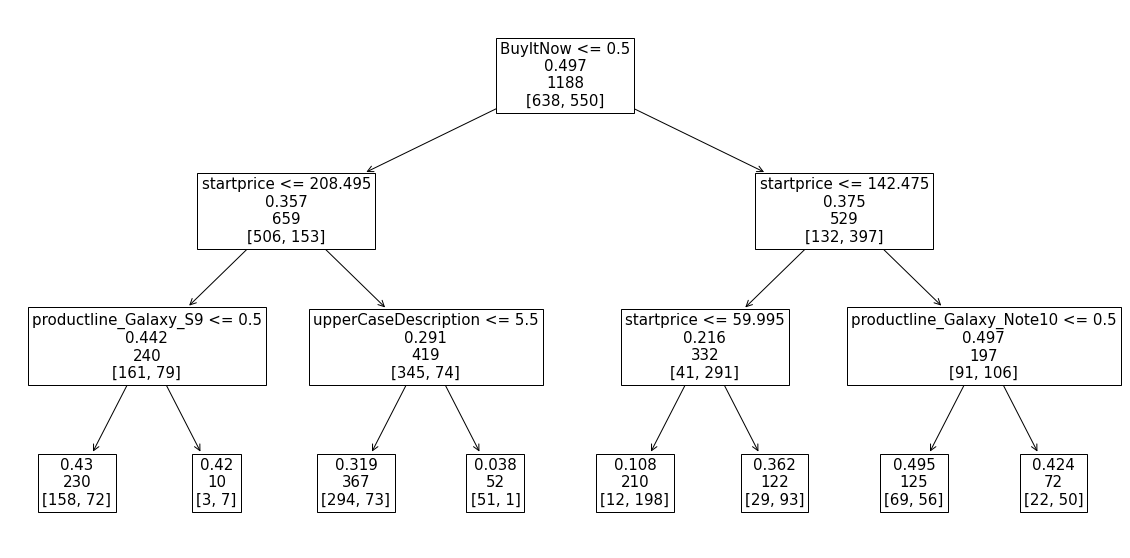

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label='None', max_depth=3)